In [454]:
#Importing essential packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [455]:
#Reading Portuguese data
Portuguese =pd.read_csv("/content/student-por.csv",delimiter=";")

In [456]:
#Reading Mathematics data
Mathematics = pd.read_csv("/content/student-mat.csv",delimiter=";")

In [457]:
#Lets see first five row of the dataset
Mathematics.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [458]:
#Exploring shape of the Mathematics dataframe
Mathematics.shape

(395, 33)

In [459]:
#Exploring shape of the Portuguese dataframe
Portuguese.shape

(649, 33)

In [460]:
#Checking number of Male and female student in Portuguese class
Portuguese["sex"].value_counts()


F    383
M    266
Name: sex, dtype: int64

In [461]:
#choosing plotting style
plt.style.use("fivethirtyeight")

''

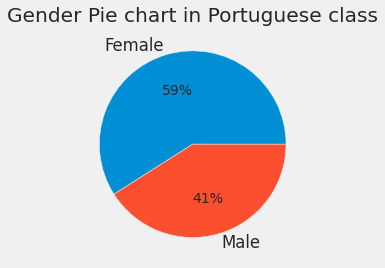

In [462]:
#plotting student propotion for Portuguese
Labels = ["Female","Male"]
plt.title("Gender Pie chart in Portuguese class")
plt.pie(Portuguese["sex"].value_counts(),autopct='%.0f%%',labels=Labels)
;

([<matplotlib.patches.Wedge at 0x7f7ca7e63790>,
 [Text(-0.09175509895664602, 1.096166502779325, 'Female'),
  Text(0.09175520158716051, -1.096166494188588, 'Male')],
 [Text(-0.050048235794534185, 0.5979090015159955, '53%'),
  Text(0.05004829177481482, -0.5979089968301389, '47%')])

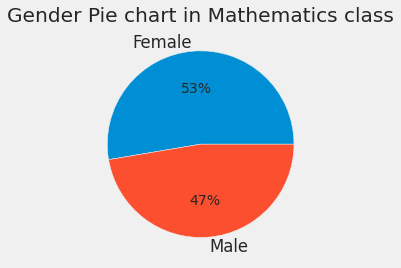

In [463]:
#plotting student propotion for Mathematics
Labels = ["Female","Male"]
plt.title("Gender Pie chart in Mathematics class")
plt.pie(Mathematics["sex"].value_counts(),autopct='%.0f%%',labels=Labels)

In [464]:
#Giving columns more understandable names  
Mathematics = Mathematics.rename(columns={"G1":"Term 1","G2":"Term 2","G3":"Term 3","famsize":"Family Size","Pstatus":"Paretn's Cohabitation","famsup":"Family Support","Mjob":"Mother's Job","Fjob":"Father's Job","studytime":"Study Time","goout":"Goes Out"})
Portuguese =  Portuguese.rename(columns={"G1":"Term 1","G2":"Term 2","G3":"Term 3","famsize":"Family Size","Pstatus":"Paretn's Cohabitation","famsup":"Family Support","Mjob":"Mother's Job","Fjob":"Father's Job","studytime":"Study Time","goout":"Goes Out"})


Text(0.5, 1.0, 'No of student belonging to Gabriel Pereira(GP) and Mousinho da Silveira(MS) in Mathematics class')

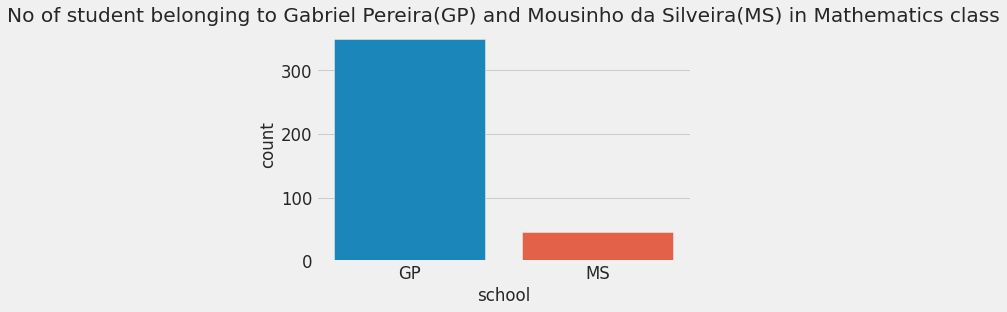

In [465]:
sns.countplot(x="school",data=Mathematics)
plt.title("No of student belonging to Gabriel Pereira(GP) and Mousinho da Silveira(MS) in Mathematics class")

In [466]:
Mathematics["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [467]:
Portuguese["school"].value_counts()

GP    423
MS    226
Name: school, dtype: int64

Text(0.5, 1.0, 'No of student belonging to Gabriel Pereira(GP) and Mousinho da Silveira(MS) in Portuguese class')

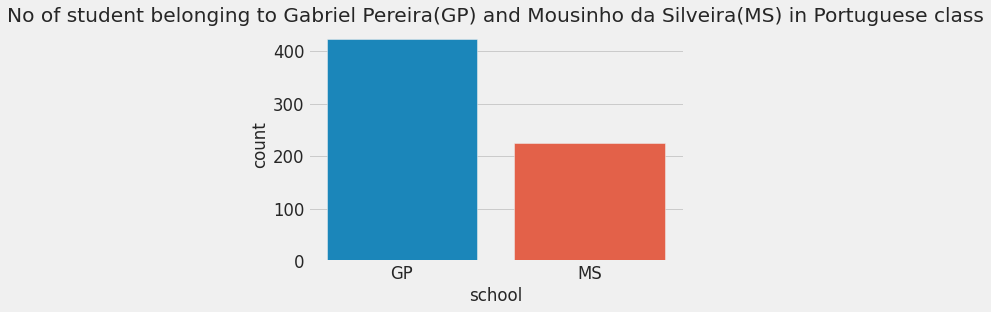

In [468]:
sns.countplot(x="school",data=Portuguese)
plt.title("No of student belonging to Gabriel Pereira(GP) and Mousinho da Silveira(MS) in Portuguese class")

In [469]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


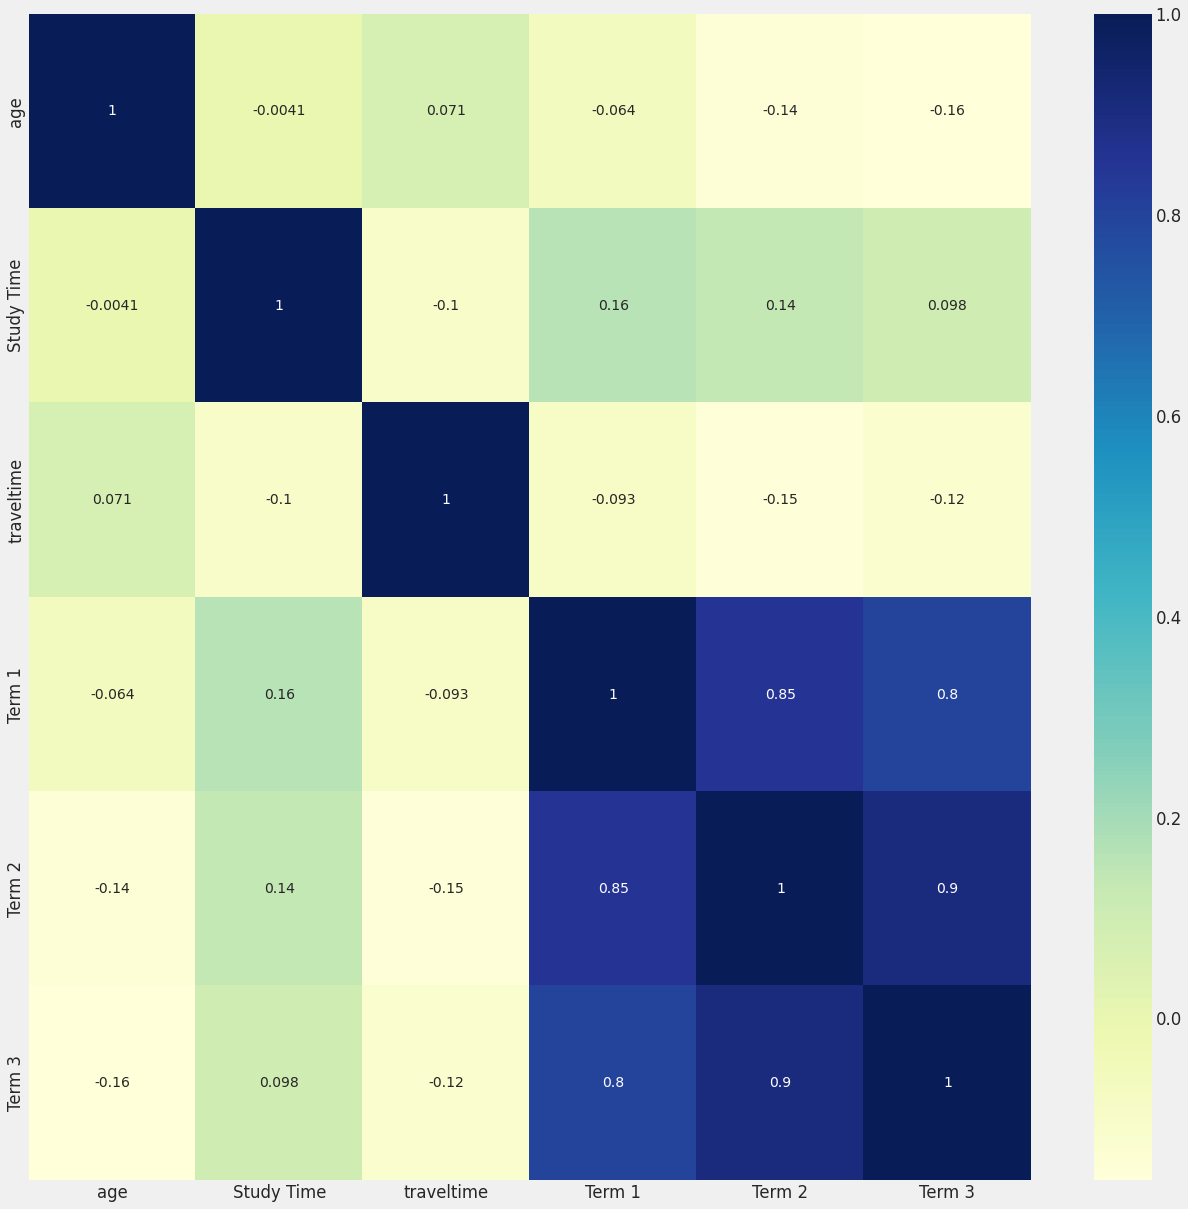

In [470]:
plt.figure(figsize=(20,20))
sns.heatmap(Mathematics[["age","Study Time","traveltime","Term 1","Term 2","Term 3"]].corr(),cmap="YlGnBu",annot= True)
sns.set(font_scale=1.5)

In [471]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0.5, 0.98, 'Term 1 and Term 2 Marks for both the genders')

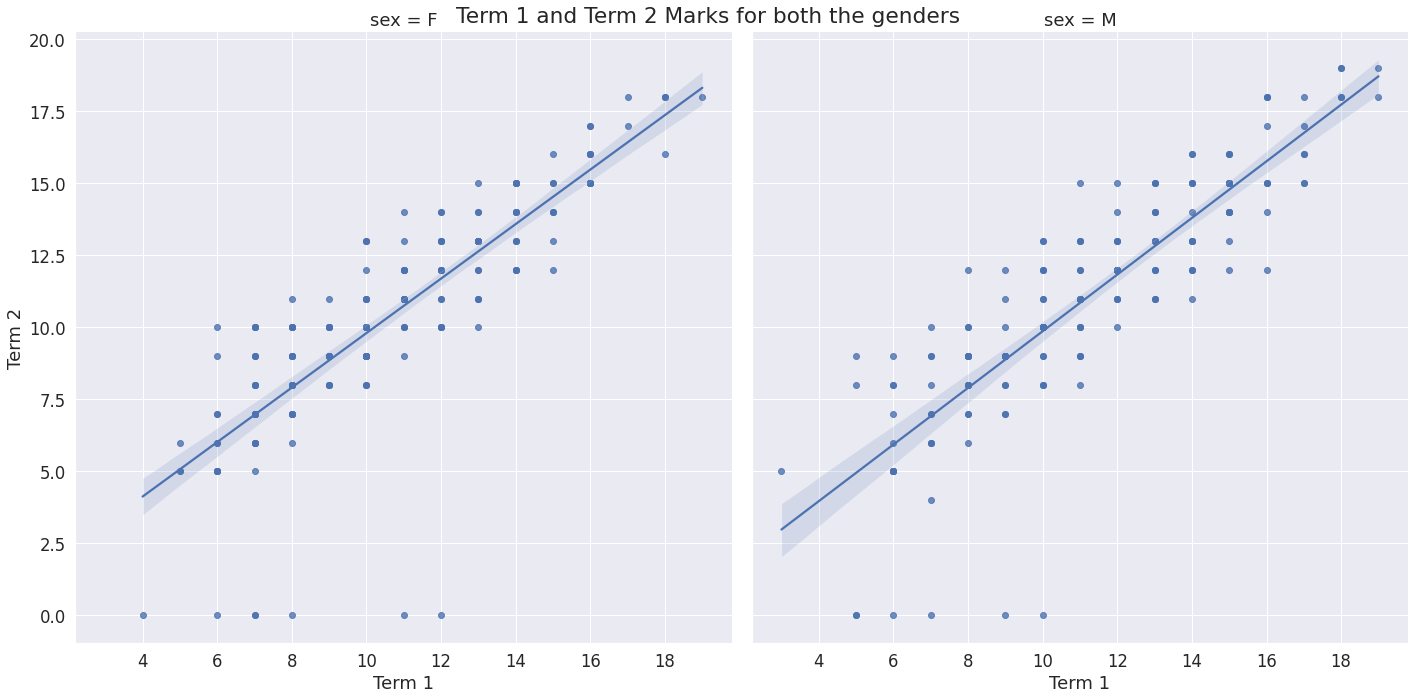

In [472]:
#people performing well in term 1 are performing in term 2 
# lets see the he scatterplot and how closely it fits a linear function
f = sns.lmplot(data= Mathematics,x="Term 1",y="Term 2",col="sex",height=10, aspect=1)
f.fig.suptitle("Term 1 and Term 2 Marks for both the genders")

In [473]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0.5, 0.98, 'Marks Distribution for the three terms')

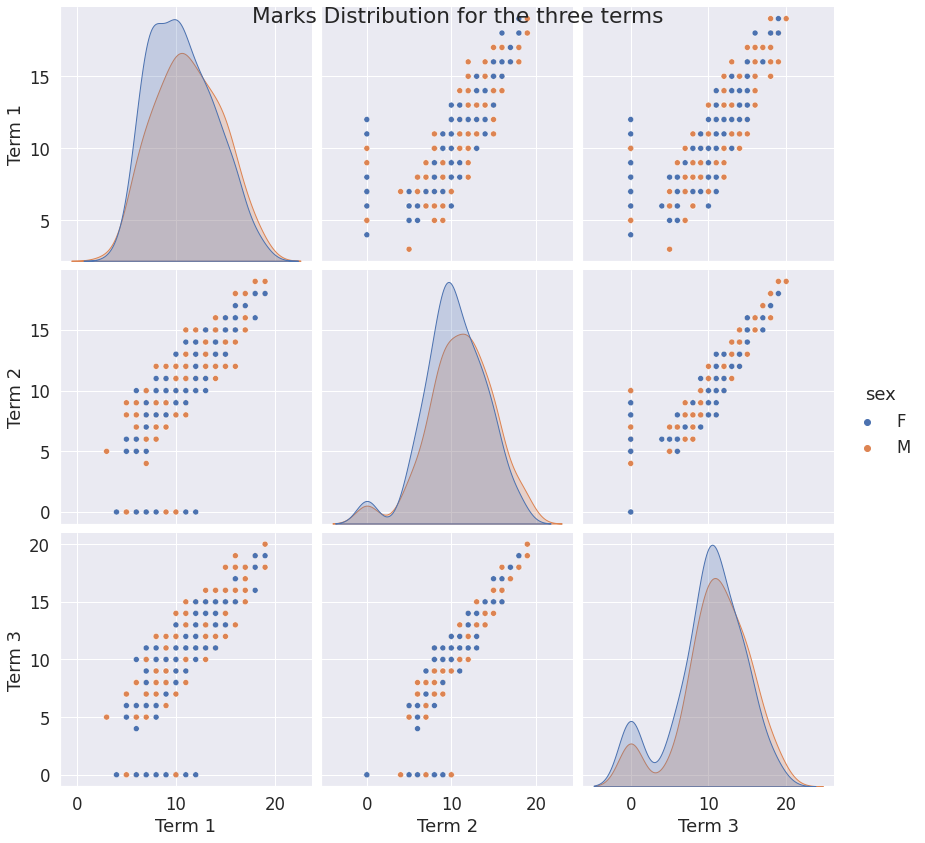

In [474]:
#Pairsplot betweet three terms marks
f2 = sns.pairplot(Mathematics[["Term 1","Term 2","Term 3","sex"]],hue="sex",height=4, aspect=1)
f2.fig.suptitle("Marks Distribution for the three terms")



In [475]:
MLdata_Portuguese = pd.get_dummies(data=Portuguese,columns=["school","sex","address","Family Size","Paretn's Cohabitation","Mother's Job","Father's Job","reason","guardian","schoolsup","Family Support","paid","activities","nursery","higher","internet","romantic"])

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X = MLdata_Portuguese.drop(columns="Term 3",axis=1)
Y = MLdata_Portuguese["Term 3"]

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [479]:
X_train.shape

(434, 58)

In [480]:
X_test.shape

(215, 58)

In [481]:
y_test.shape

(215,)

In [482]:
#importing stadard scalar to standardize data before using ML pipeline
from sklearn.preprocessing import StandardScaler

In [483]:
#instantiating the standardscaler class
scaler = StandardScaler()

In [484]:
#Fitting the training dataset on standardscalar transformer
X_train_scaled = scaler.fit_transform(X_train)

In [485]:
#Fitting the test data on standardscalar transformer
X_test_scaled = scaler.fit_transform(X_test)

In [486]:
#Importing the linearRegression model
from sklearn.linear_model import LinearRegression

In [487]:
#Creating instance of LinearRegression
model = LinearRegression()

In [488]:
#Fitting the model on training dataset
model.fit(X_train,y_train)

LinearRegression()

In [489]:
#Taking a look at the Linear regression coefficient
model.coef_

array([ 1.46250877e-02, -1.94874729e-01,  7.99976764e-02,  1.21089288e-01,
        3.91033342e-02, -1.89145575e-01, -6.43885443e-02, -9.99354930e-02,
        4.74664806e-02, -1.02692535e-01,  5.52598208e-03, -7.03425491e-02,
        1.94984901e-02,  2.15295224e-01,  8.37469619e-01, -1.90487151e+10,
       -1.90487151e+10, -3.01906845e+10, -3.01906845e+10, -1.11214620e+11,
       -1.11214620e+11, -5.14364304e+10, -5.14364304e+10, -8.35887092e+10,
       -8.35887092e+10, -1.79907486e+11, -1.79907486e+11, -1.79907486e+11,
       -1.79907486e+11, -1.79907486e+11,  7.87215415e+10,  7.87215415e+10,
        7.87215415e+10,  7.87215415e+10,  7.87215415e+10,  2.45301589e+11,
        2.45301589e+11,  2.45301589e+11,  2.45301589e+11, -4.81050853e+11,
       -4.81050853e+11, -4.81050853e+11,  6.78087694e+09,  6.78087694e+09,
       -5.76547823e+10, -5.76547823e+10, -3.40826663e+10, -3.40826663e+10,
        7.93582543e+10,  7.93582543e+10, -4.28980922e+10, -4.28980922e+10,
       -2.82760744e+10, -

In [490]:
#Predicting for test set
model.predict(X_test)

array([18.50463867, 11.76062012, 18.71508789, 10.70458984, 11.71264648,
       16.55444336, 17.70349121,  9.52746582, 11.03771973, 10.44042969,
       18.76049805, 11.9251709 , 12.47351074,  9.19763184, 10.90454102,
       13.83984375, 11.66247559,  7.80334473, 15.35705566, 14.98693848,
       15.49682617, 13.65625   , 14.51428223, 12.05554199, 14.76660156,
       12.65844727,  8.6418457 , 11.609375  , 11.26757812, 15.35400391,
       15.93261719, 13.00439453,  8.08190918,  6.62878418, 17.78076172,
       15.89123535, 13.9465332 , 15.83532715, 13.22729492, 11.3470459 ,
       13.6159668 , 11.15979004,  8.70861816, 11.74853516, 13.40075684,
       13.10253906, 18.10302734, 11.23461914, 11.82788086, 11.46740723,
       10.99145508, 11.04541016, 14.41918945, 10.02807617, 10.46081543,
       17.92321777,  8.92480469, 10.4251709 , 11.58117676, 10.35900879,
        8.41247559, 11.44689941, 16.140625  , 12.25      , 15.53857422,
       16.27453613,  9.68225098,  7.82202148,  9.84594727,  9.68

In [491]:
#Importing metrics for model evaluation
from sklearn import metrics

In [492]:
#MSE
metrics.mean_squared_error(y_test, model.predict(X_test))

1.4267508032710052

In [493]:
#MAE
metrics.mean_absolute_error(y_test, model.predict(X_test))

0.7980593659156977

In [494]:
#RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
RMSE

1.1944667443135473

In [495]:
from sklearn.cluster import KMeans

In [496]:
##Making a function that will do KMeans clustering of the dataset
def ML_models(df):
  metric = []
  i=[]
  df_new = df[["Term 1","Term 2","Term 3"]]
  for k in range (2,10):
    KMC = KMeans(n_clusters=k)
    KMC.fit(df_new)
    metric.append(KMC.inertia_)
    i.append(k)
  plt.figure(figsize=(10,10))    
  plt.plot(i,metric,'bx-')
  plt.xlabel('No of centroids')
  plt.ylabel('sum of square of distance between nearest centroid')
  #4 clusters are ideal
  KMC = KMeans(n_clusters=5)
  KMC.fit(df_new)
  #df_cluster = pd.concat([df_new,KMC.labels_],axis=1)
  l = KMC.labels_
  #sns.relplot(data=df_new,x="temperature",y="mood",kind="scatter",hue="KMC.labels_")
  df_new["cluster"] = l
  #sns.relplot(kind="scatter",data=df_new,x="G1",y="G2",hue="cluster")
  fig = plt.figure()
  my_cmap = plt.get_cmap('viridis')
  ax = fig.add_subplot(111, projection='3d')
  x = np.array(df_new["Term 1"])
  y = np.array(df_new["Term 2"])
  z = np.array(df_new["Term 3"])
  ax.set_xlabel('Term 1 ', fontweight ='bold')
  ax.set_ylabel('Term 2 ', fontweight ='bold')
  ax.set_zlabel('Term 3 ', fontweight ='bold')
  plt.title("Visualizing clusters on 3D plot")
  
  ax.scatter(x,y,z, marker="s", c=df_new["cluster"], s=40, cmap=my_cmap,label="cluster")
  ax.legend()
 

  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


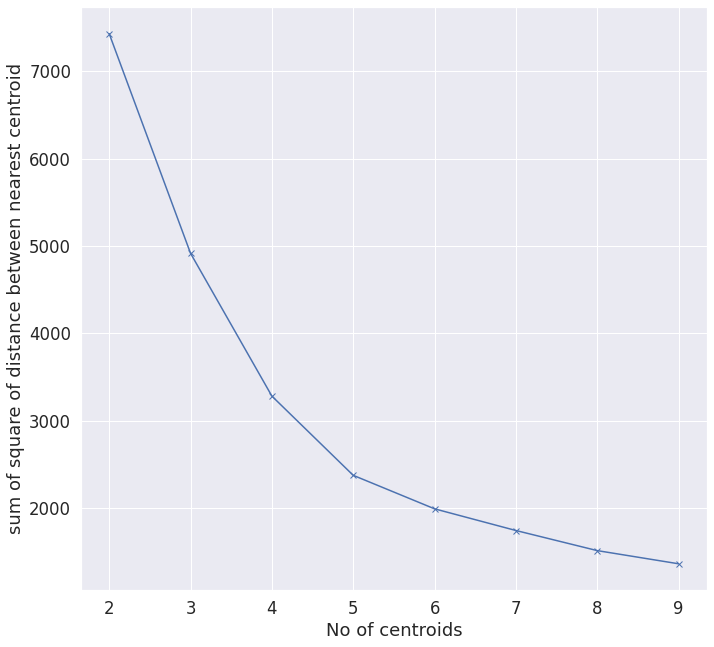

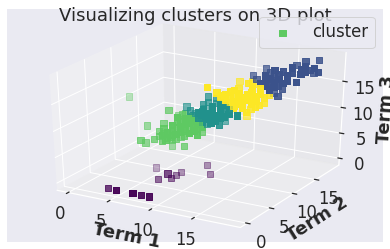

In [497]:
ML_models(MLdata_Portuguese)

In [498]:
Portuguese.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Text(0.5, 1.0, 'Effect of internet accessibility on Maths Marks')

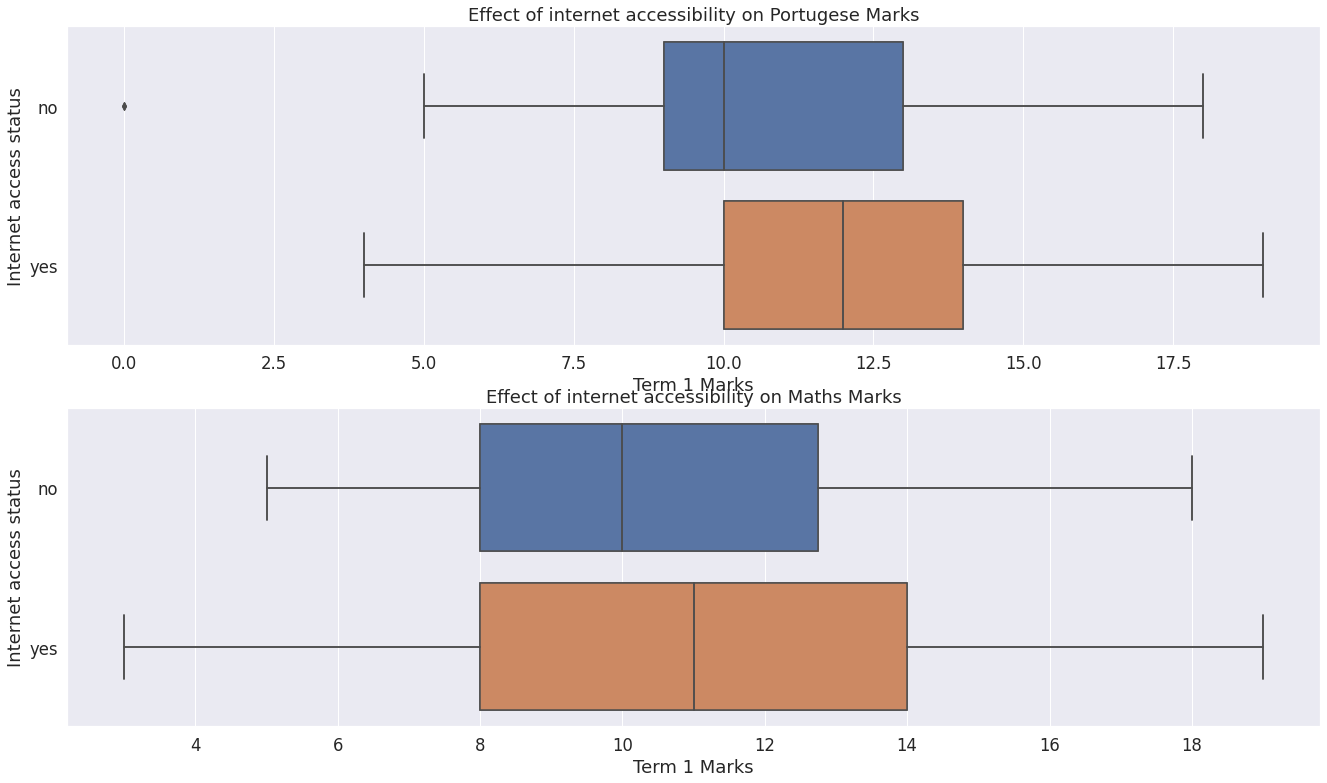

In [499]:

plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.boxplot(data=Portuguese,x="Term 1",y="internet")
plt.xlabel("Term 1 Marks")
plt.ylabel("Internet access status")
plt.title("Effect of internet accessibility on Portugese Marks")
sns.boxplot(data=Portuguese,x="Term 1",y="internet")
plt.xlabel("Term 1 Marks")
plt.ylabel("Internet access status")
plt.title("Effect of internet accessibility on Portugese Marks")
plt.subplot(2,1,2)
sns.boxplot(data=Mathematics,x="Term 1",y="internet")
plt.xlabel("Term 1 Marks")
plt.ylabel("Internet access status")
plt.title("Effect of internet accessibility on Maths Marks")
sns.boxplot(data=Mathematics,x="Term 1",y="internet")
plt.xlabel("Term 1 Marks")
plt.ylabel("Internet access status")
plt.title("Effect of internet accessibility on Maths Marks")





In [500]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0.5, 0.98, 'Mathematics Marks')

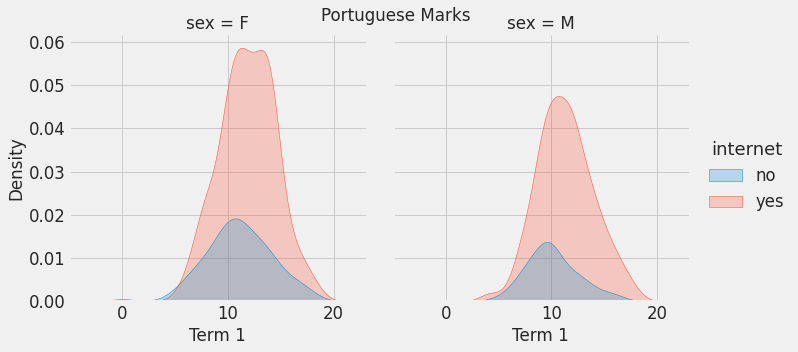

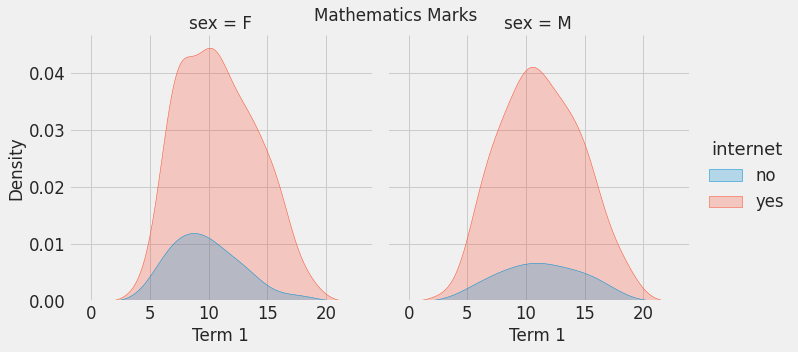

In [501]:
plt.style.use("fivethirtyeight")
fig1 = sns.displot(data=Portuguese,x="Term 1",hue="internet",col="sex",kind="kde",fill=True)
fig2 = sns.displot(data=Mathematics,x="Term 1",hue="internet",col="sex",kind="kde",fill=True)
fig1.fig.suptitle('Portuguese Marks')
fig2.fig.suptitle('Mathematics Marks')



In [502]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [503]:
Portuguese.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


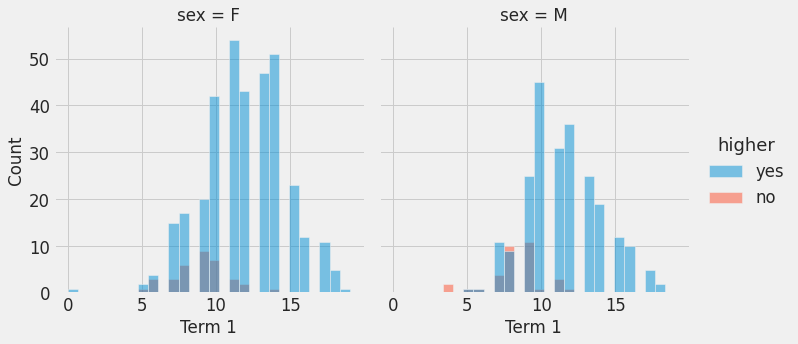

In [504]:
sns.displot(data=Portuguese,x="Term 1",hue="higher",col="sex")

In [505]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0.5, 0.98, 'Portuguese Marks')

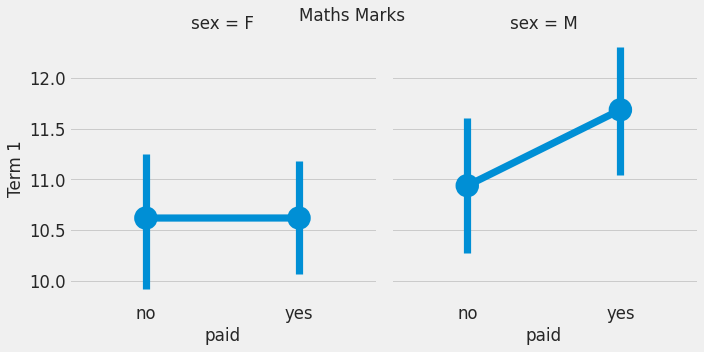

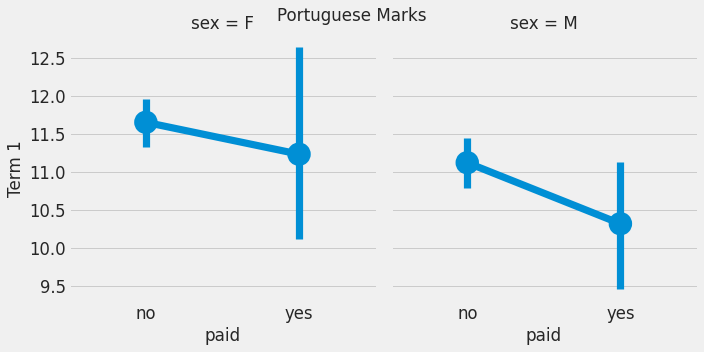

In [506]:

fig3 = sns.catplot(data=Mathematics,x="paid",y="Term 1",kind="point",col="sex")
fig3.fig.suptitle("Maths Marks")
fig4 = sns.catplot(data=Portuguese,x="paid",y="Term 1",kind="point",col="sex")
fig4.fig.suptitle("Portuguese Marks")

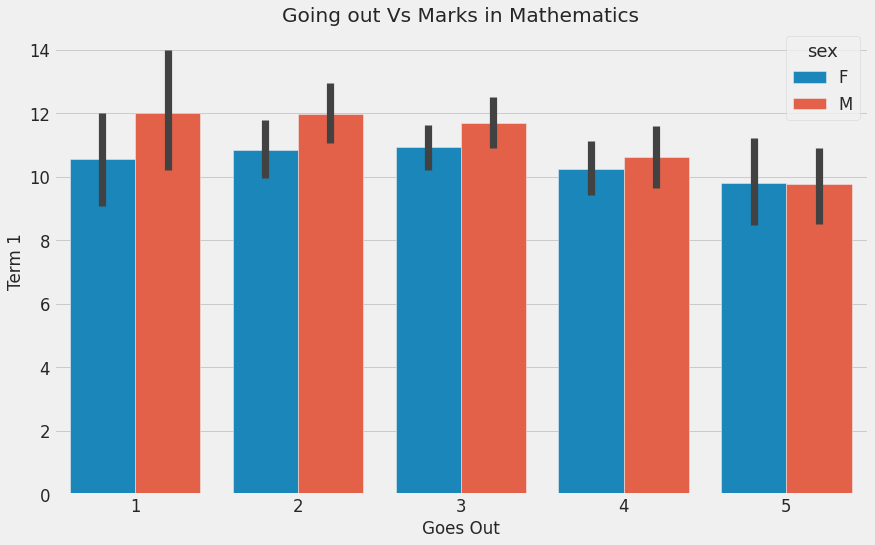

In [507]:
plt.figure(figsize=(13,8))
plt.title("Going out Vs Marks in Mathematics")
sns.barplot(data=Mathematics,x="Goes Out",y="Term 1",hue="sex")





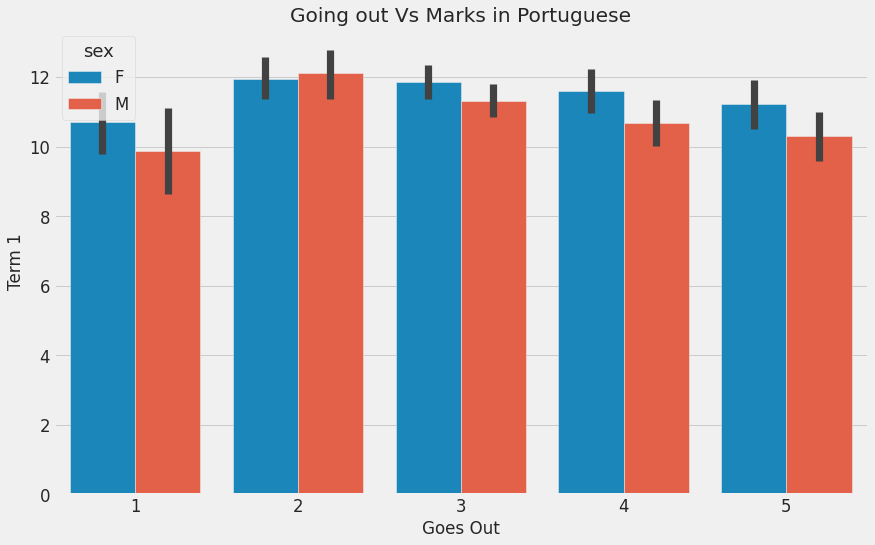

In [508]:
plt.figure(figsize=(13,8))
plt.title("Going out Vs Marks in Portuguese")
sns.barplot(data=Portuguese,x="Goes Out",y="Term 1",hue="sex")

In [509]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(38.495000000000005, 0.5, 'Term 1 Marks')

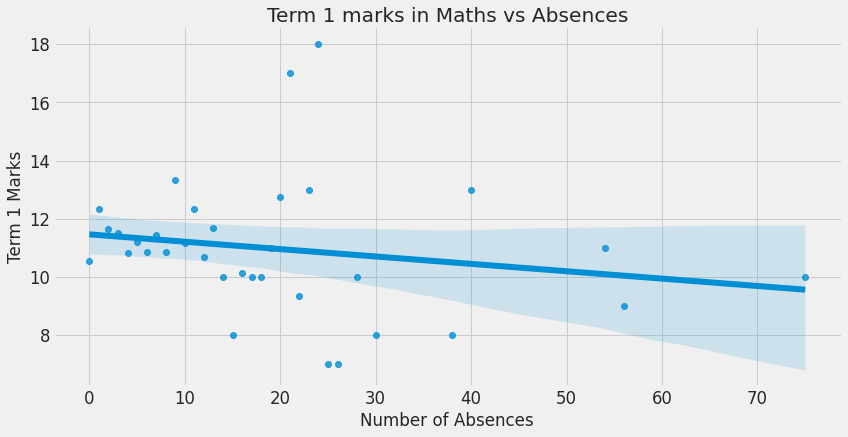

In [510]:
x = Mathematics.groupby("absences")[["Term 1"]].mean()
y = pd.DataFrame(x)
y["Absences"] = y.index
sns.lmplot(data=y,x="Absences",y="Term 1",aspect=2,height=6)
plt.title("Term 1 marks in Maths vs Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Term 1 Marks")

Text(38.495000000000005, 0.5, 'Term 1 Marks')

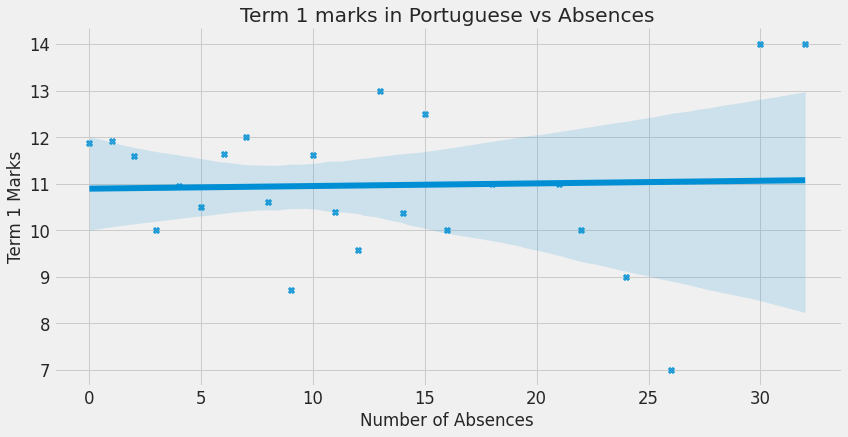

In [511]:
x = Portuguese.groupby("absences")[["Term 1"]].mean()
y = pd.DataFrame(x)
y["Absences"] = y.index
sns.lmplot(data=y,x="Absences",y="Term 1",aspect=2,height=6,markers="X")
plt.title("Term 1 marks in Portuguese vs Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Term 1 Marks")


In [512]:
Mathematics.head(5)

,school,sex,age,address,Family Size,Paretn's Cohabitation,Medu,Fedu,Mother's Job,Father's Job,reason,guardian,traveltime,Study Time,failures,schoolsup,Family Support,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Goes Out,Dalc,Walc,health,absences,Term 1,Term 2,Term 3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarplot for Marks distribution in Maths for Urban and Rural student')

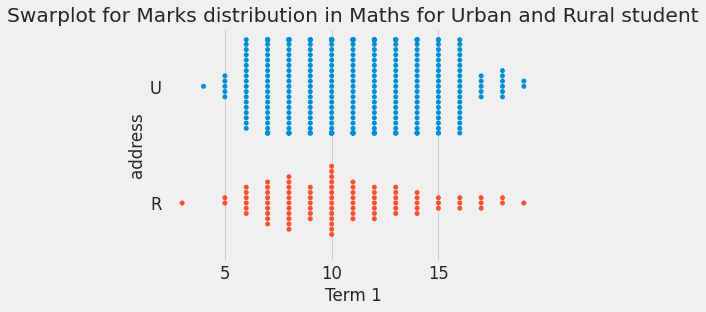

In [513]:
sns.swarmplot(x="Term 1",y="address",data=Mathematics)
plt.title("Swarplot for Marks distribution in Maths for Urban and Rural student")


Text(26.849014583333336, 0.5, 'No of student')

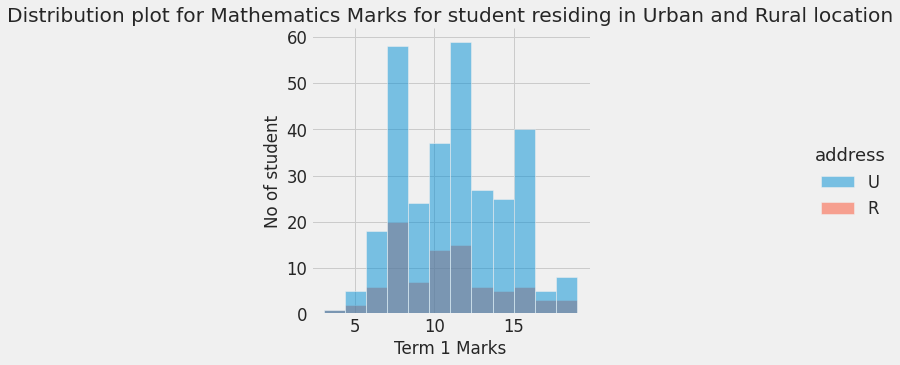

In [514]:
sns.displot(data=Mathematics,x="Term 1",hue="address")
plt.title("Distribution plot for Mathematics Marks for student residing in Urban and Rural location")
plt.xlabel("Term 1 Marks")
plt.ylabel("No of student")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Term 1 Marks')

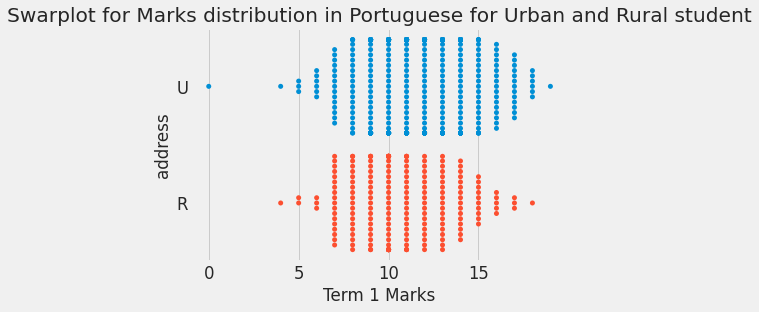

In [515]:
sns.swarmplot(x="Term 1",y="address",data=Portuguese)
plt.title("Swarplot for Marks distribution in Portuguese for Urban and Rural student")
plt.xlabel("Term 1 Marks")

Text(26.849014583333336, 0.5, 'No of student')

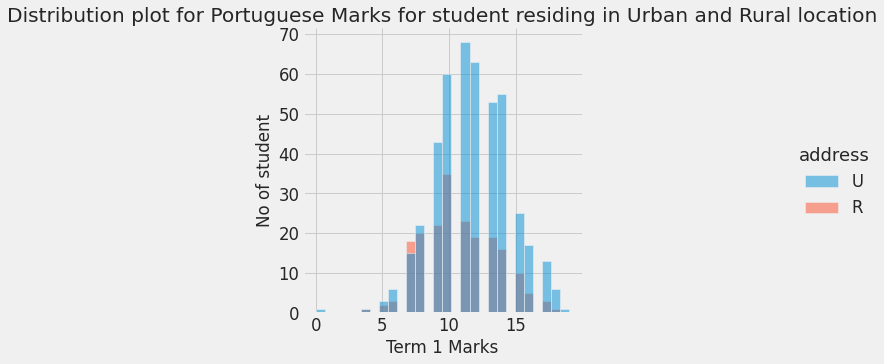

In [516]:
sns.displot(data=Portuguese,x="Term 1",hue="address")
plt.title("Distribution plot for Portuguese Marks for student residing in Urban and Rural location")
plt.xlabel("Term 1 Marks")
plt.ylabel("No of student")

In [517]:
Mathematics["failures"].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [518]:
Portuguese["failures"].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

Text(0.5, 0.98, 'Marks distribution for Portuguese')

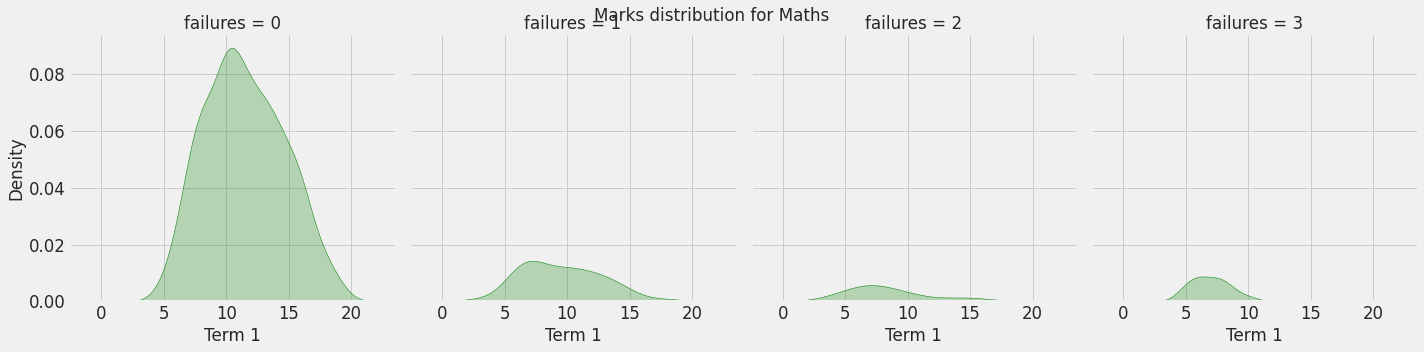

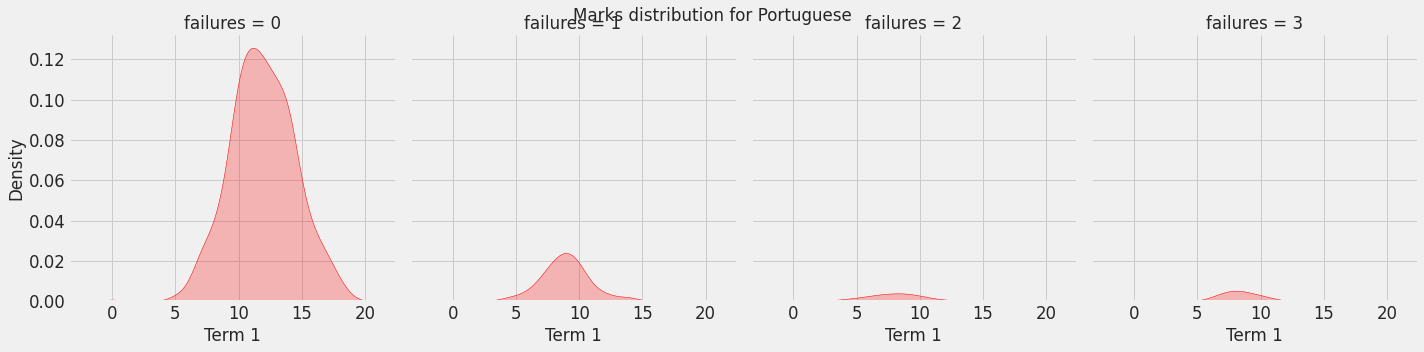

In [519]:
fig6 = sns.displot(data=Mathematics,x="Term 1",col="failures",kind="kde",fill="True",color="green")
fig6.fig.suptitle("Marks distribution for Maths")
fig7 = sns.displot(data=Portuguese,x="Term 1",col="failures",kind="kde",fill="True",color="red")
fig7.fig.suptitle("Marks distribution for Portuguese")


Text(0.5, 1.0, 'Density curve for two schools for Mathematics')

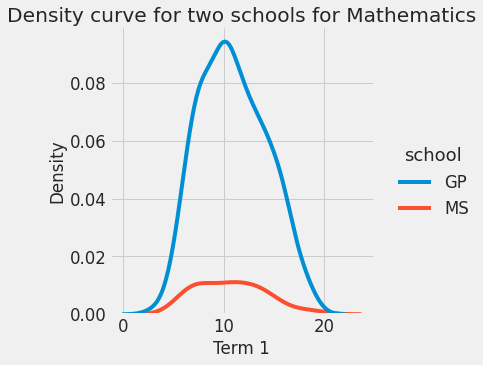

In [522]:
sns.displot(data=Mathematics,hue="school",x="Term 1",kind="kde")
plt.title("Density curve for two schools for Mathematics")
plt.xlabel("Term 1 Marks")

Text(0.5, 1.0, 'Density curve for two schools for Portuguese')

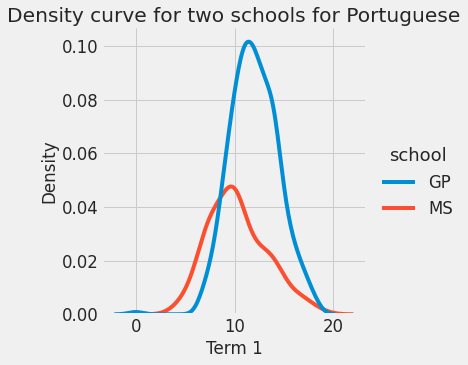

In [523]:

sns.displot(data=Portuguese,hue="school",x="Term 1",kind="kde")
plt.title("Density curve for two schools for Portuguese")
plt.xlabel("Term 1 Marks")